In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
import seaborn as sns 


df=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Data-Analysis-Personal-Projects/main/Data%20Cleaning/Project1-Airbnb/Airbnb_Open_Data.csv")
df.head(5)

C:\Users\m21ne\AppData\Local\Temp\ipykernel_37776\841464823.py:9: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Data-Analysis-Personal-Projects/main/Data%20Cleaning/Project1-Airbnb/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# Data Cleaning

## Number of rows and columns

In [2]:
rows,columns=df.shape
print('Rows: ',rows)
print('Columns: ',columns)

Rows:  102599
Columns:  26


## Checking Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

**Data Type Watch List**:

- Construction year: float65 to int64
- service fee :object to int64
- price: object to int64
- minimum nights: float64 to int64
- number of reviews: float64 to int64
- reviews per month: float64 to int64
- review rate number: float64 to int64
- availability 365: float64 to int64
- last review: object to datetime
    

## DataType Conversion

### Re-Structuring of Price & Service Fee

In [4]:
# To convert, the object can not have any non-numerical character such as , white space ' ', or '$'

def data_syntax_util(columnName): 
    price_column=df[columnName].astype(str).to_numpy()
    number=""
    temp_list=[]
    for price_string in price_column:
        price_string[1:] # Removing '$' from the price
        for i in range(len(price_string)):
            if price_string[i].isnumeric():
                number+=price_string[i]
        number=number.strip() # Striping any leading white space
        number=number.lstrip()
        number=number.replace(',','')  # Removing any comma within the number
        temp_list.append(number)
        number=""
#         temp_list.append(t) #collecting the cleaned number into temp_list list
    return temp_list

new_price_list=data_syntax_util('price')
print(len(new_price_list))

102599


In [5]:
def column_util(new_list,newColumnName):
    global df
    df = df.reset_index(drop=True)  # Reset the index to avoid any issues with duplicates

    df[newColumnName] = new_list # adding the list to the dataframe
    
    
column_util(new_price_list,'price')
df.replace('',0,inplace=True)
# df[df.Price.index==147]
df[['price']].head(5)

,price
0,966
1,142
2,620
3,368
4,204


In [6]:
# df.dropna(subset=['reviews per month', 'last review'], inplace=True)


df.price.fillna('0',inplace=True)
df['service fee'].fillna('0',inplace=True)

pd.isnull(df['service fee']).sum()


# df.dropna(inplace=True)

0

In [7]:
new_service_list=data_syntax_util('service fee')
df['service fee']=new_service_list
df[['service fee']].head()

,service fee
0,193
1,28
2,124
3,74
4,41


In [18]:
dataType_change=['Construction year','service fee','price','minimum nights','number of reviews','reviews per month','review rate number','availability 365']
def change_dataType():
    for i in range(8):
        try:
            df[dataType_change[i]]=df[dataType_change[i]].astype(int)
            print("The column",dataType_change[i],"data type was updated")
        except:
            print("The following column need processing before data type can changed",dataType_change[i])



        
change_dataType()
df['last review']=pd.to_datetime(df['last review'])
df.info()

# df['minimum nights']=df['minimum nights'].astype(int)
# df['minimum nights'].info()

The following column need processing before data type can changed Construction year
The column service fee data type was updated
The column price data type was updated
The following column need processing before data type can changed minimum nights
The following column need processing before data type can changed number of reviews
The following column need processing before data type can changed reviews per month
The following column need processing before data type can changed review rate number
The following column need processing before data type can changed availability 365
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                

In [11]:
df['Construction year'].fillna(0.0,inplace=True)
df['Construction year']=pd.to_datetime(df['Construction year'])
df['Construction year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 102599 entries, 0 to 102598
Series name: Construction year
Non-Null Count   Dtype         
--------------   -----         
102599 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 801.7 KB


There are 9 columns with float data type,2 columns are int64 and 15 columns string/objects. While inspecting the data types, it is evidenced that price and services fee data types happen to be object data type. The more appropriate data type is float, since both of these attributes might contain decimal values.It is a good idea to look at these specific unique values. As it was inspected in the dataframe , the syntax of price include dollar sign which is non-numerical makes the analyze difficult so it is to our advantagous to get rid off the $-sign . The same argument is valid for 'service fee' column.

## Missing Value Matrix

<AxesSubplot:>

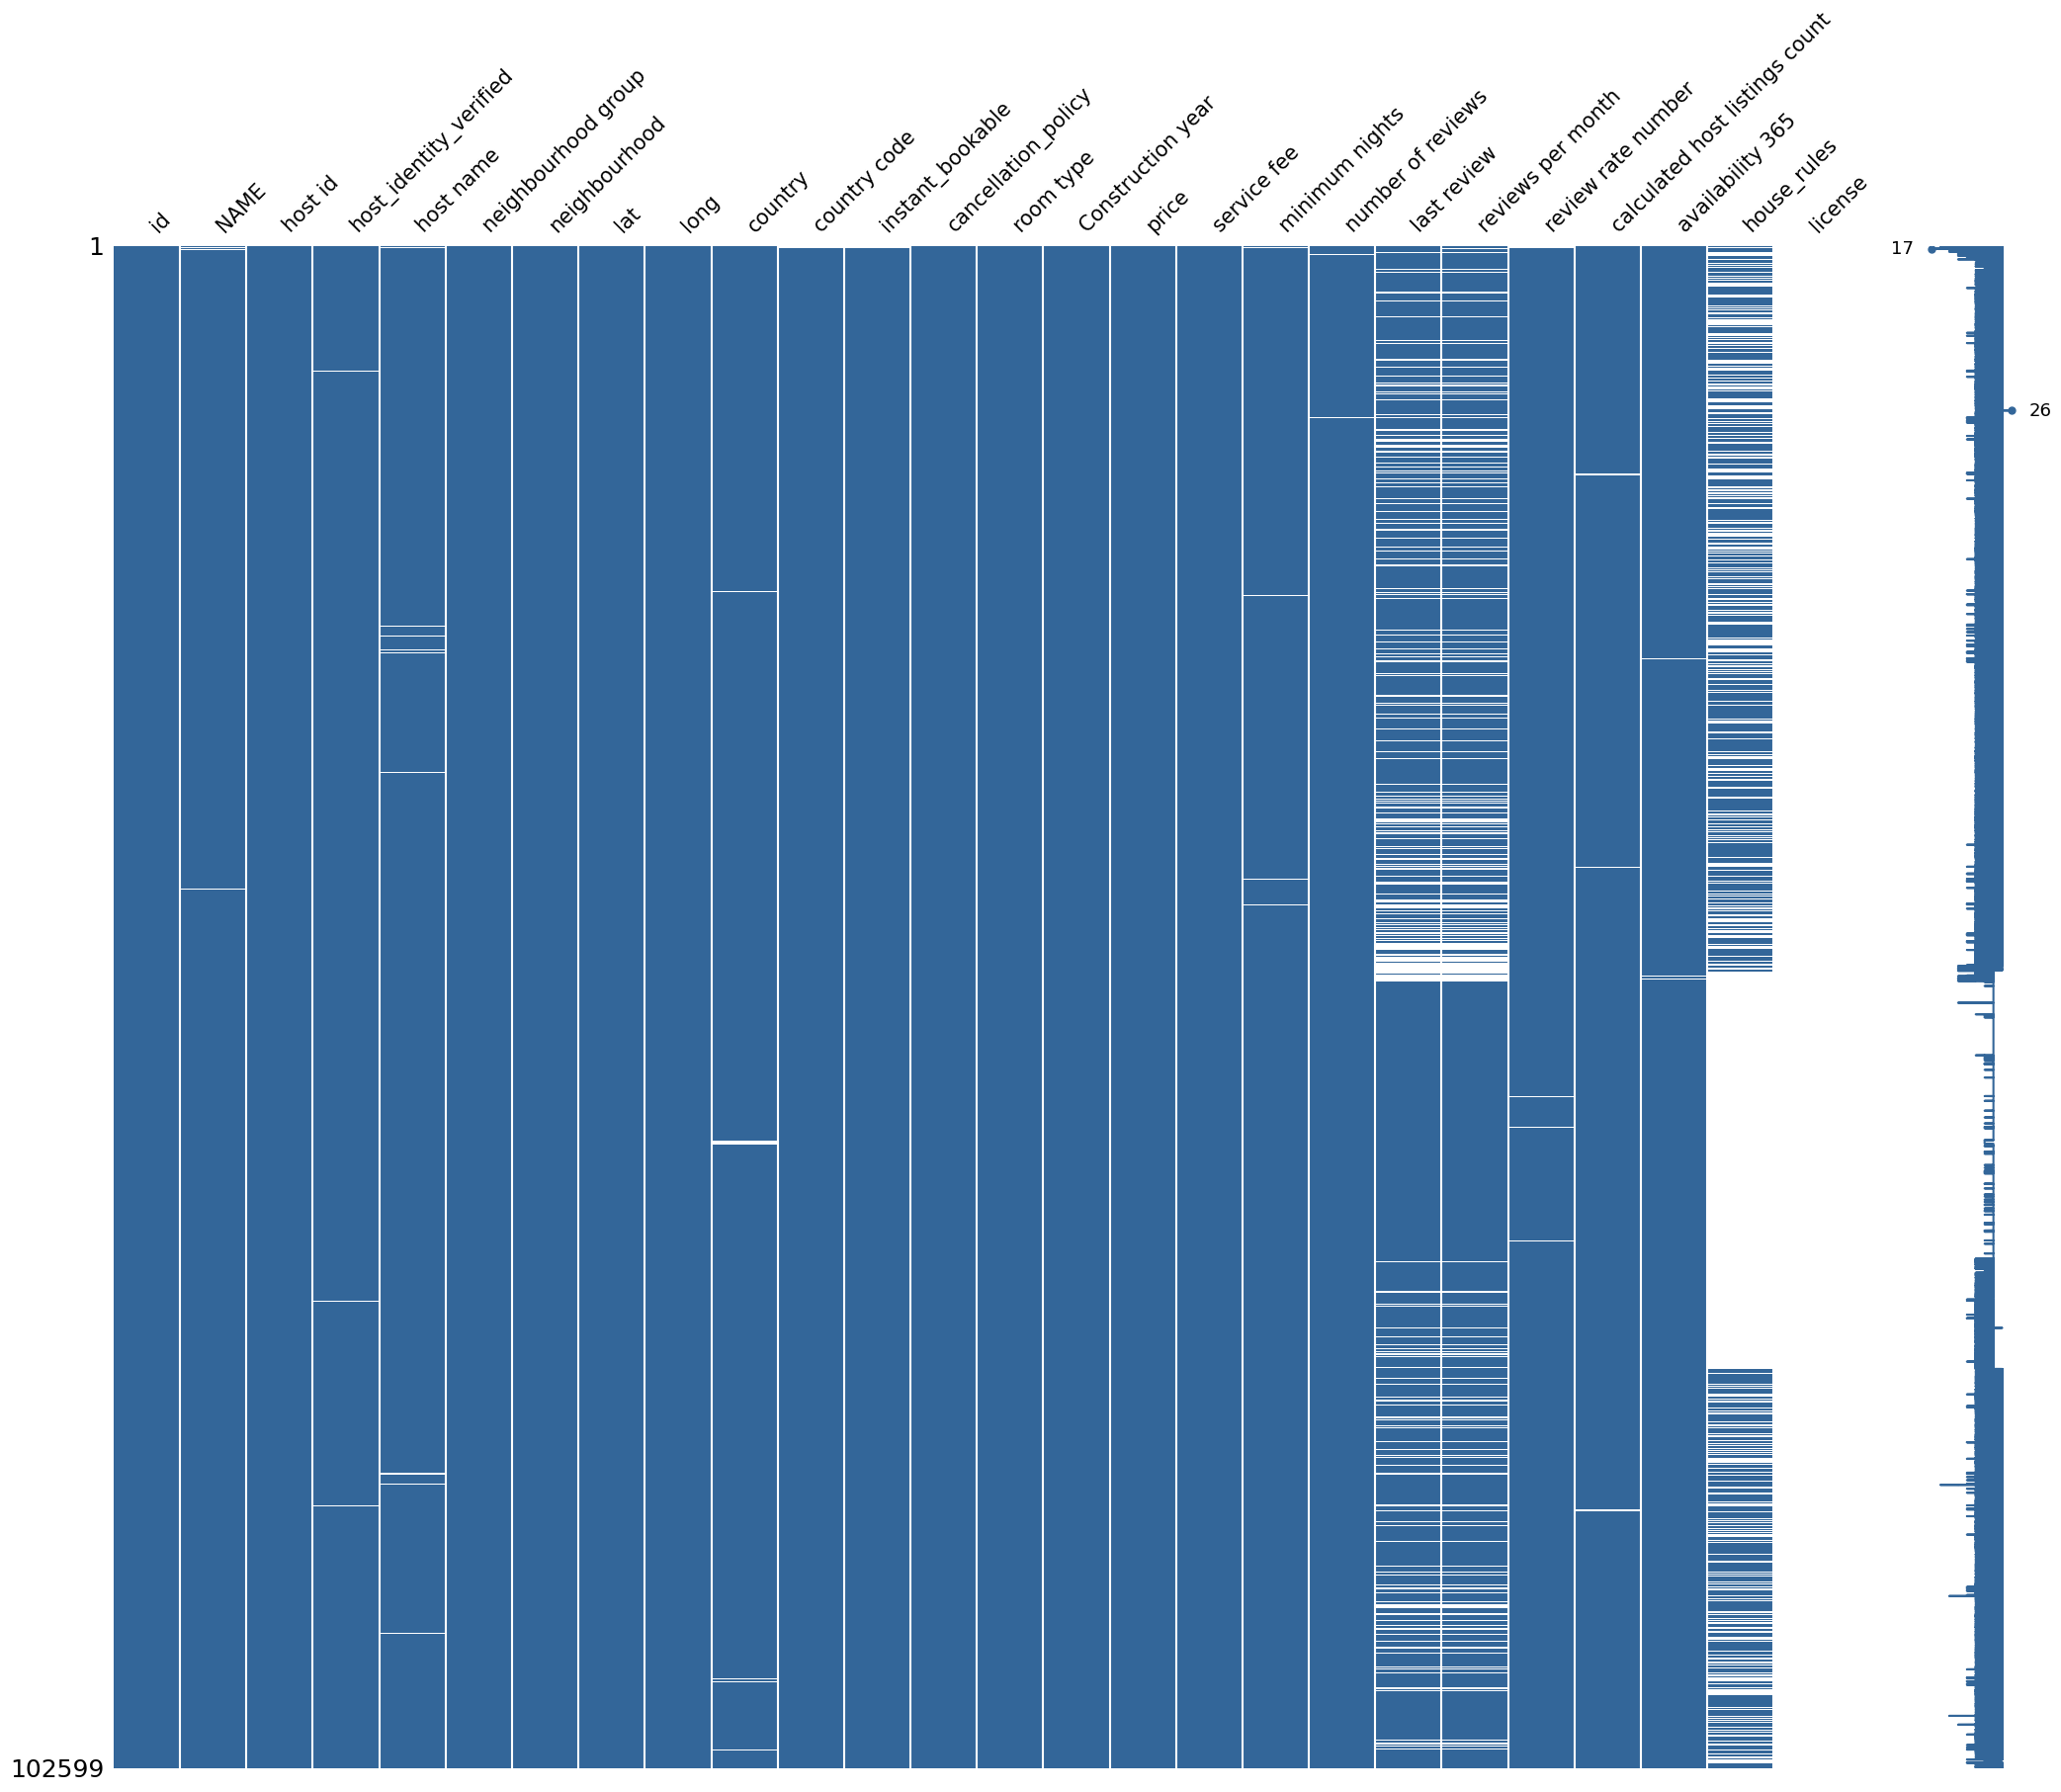

In [12]:
matrix_kws = {
    'figsize': (25, 20),     # Size of the matrix
    'fontsize': 15,         # Font size
    'color': (0.2, 0.4, 0.6) # Color palette (adjust as desired)
}
msno.matrix(df,**matrix_kws)


**The licensce column clearly has so many rows missing hence it would be good idea to discard this column. Additionally, house_rules has null values in most rows.**

## Dropping columns : license and house rules

In [13]:
df.drop(['license','house_rules'],axis=1,inplace=True)
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [14]:
null_sum_frame=pd.DataFrame({"Null Sum": df.isnull().sum()})
null_sum_frame.sort_values(by=['Null Sum'],ascending=False,inplace=True)
null_sum_frame[50<null_sum_frame['Null Sum']]

,Null Sum
last review,15893
reviews per month,15879
country,532
availability 365,448
minimum nights,409
host name,406
review rate number,326
calculated host listings count,319
host_identity_verified,289
NAME,250


In [19]:
null_grand_total=null_sum_frame['Null Sum'].sum()
null_ratio=null_grand_total/rows
print("Null Rows/Total Rows: ",null_ratio * 100)

Null Rows/Total Rows:  34.41261610736947


**It wouldn't be wise to immdietly deciding to drop all the NA values in the dataset, since by dropping all of the NA rows in each column we will lose about 34.4% of the data. We should decide on each column independently. last review and review per month column have the majority of missing values. We will need to explore all the columns individually to decide on a good approach about the missing value per column.**



In [20]:
last_review_frame=df[['last review']]
frequency_table=pd.DataFrame({"Frequency":last_review_frame.value_counts()})
frequency_table.reset_index(inplace=True)
frequency_table

,last review,Frequency
0,2019-06-23,2443
1,2019-06-30,2232
2,2019-07-01,2218
3,2019-06-24,1510
4,2019-07-07,1151
...,...,...
2472,2015-03-21,1
2473,2015-03-14,1
2474,2015-03-13,1
2475,2015-03-11,1


In [52]:
frequency_table_copy = frequency_table.copy(deep=True) # because the last review is part of the original df, modification to raise pandas SettingWithCopyWarning. To avoid this I 
frequency_table_copy['Year'] = frequency_table_copy['last review'].dt.year
frequency_table_copy['Month'] = frequency_table_copy['last review'].dt.month_name()
frequency_table_copy['Day'] = frequency_table_copy['last review'].dt.day_name()
frequency_table_copy['DayofMonth'] = frequency_table_copy['last review'].dt.day

frequency_table_copy.head(10)

,last review,Frequency,Year,Month,Day,DayofMonth
0,2019-06-23,2443,2019,June,Sunday,23
1,2019-06-30,2232,2019,June,Sunday,30
2,2019-07-01,2218,2019,July,Monday,1
3,2019-06-24,1510,2019,June,Monday,24
4,2019-07-07,1151,2019,July,Sunday,7
5,2019-06-22,1127,2019,June,Saturday,22
6,2019-07-02,1087,2019,July,Tuesday,2
7,2019-06-16,1006,2019,June,Sunday,16
8,2019-07-06,939,2019,July,Saturday,6
9,2019-07-05,934,2019,July,Friday,5


<AxesSubplot:xlabel='Year', ylabel='Frequency'>

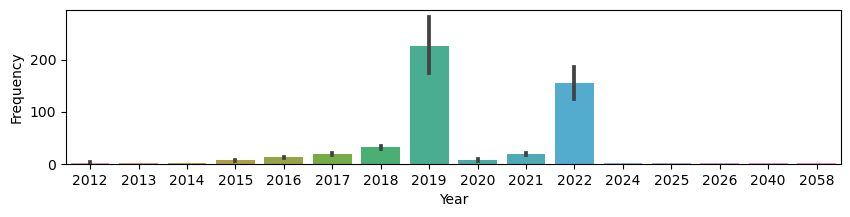

In [53]:
fig=plt.figure(figsize=(10,2))
sns.barplot(x=frequency_table_copy['Year'],y=frequency_table_copy['Frequency'],data=frequency_table)

Looking at the above table,we could interpret that 2019 had the most 'last reviews' in the dataset. This could help us with coming with random date with the year 2015 and 2022.

In [87]:
year_list=['2015','2016','2017','2018','2019','2020','2021','2022','2023']
month_list=[m for m in range(1,13)]
month_list=month_list.to_numpy()
month_list=month_list.astype(str)

day_list=[d for d i in range(1,25)]
day_list=day_list.to_numpy()
da_list=day_list.astype(str)

for i in range(15893):
    for i in zip(year,month_list,day_list):
        




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

However it would be good idea to dive deeper and group the data in term of year and see which year has the most unique in term of day and month of the year. Instead 

In [62]:
last_review_unique=frequency_table_copy.groupby(frequency_table_copy['Year']).nunique()
last_review_unique.reset_index(inplace=True)
last_review_unique

,Year,last review,Frequency,Month,Day,DayofMonth
0,2012,12,2,5,7,10
1,2013,41,4,11,7,23
2,2014,132,6,12,7,31
3,2015,296,28,12,7,31
4,2016,358,43,12,7,31
5,2017,354,60,12,7,31
6,2018,365,84,12,7,31
7,2019,189,135,7,7,31
8,2020,297,31,11,7,31
9,2021,361,70,12,7,31


**The above table shows an interesting aspect of the data. We can see 2015-2018 we have data for almost every single day of the month. 2019 which is the year with most 'last review' data have 189 unique data for the 'last review'. However before visualization of the trend within the last review data, we see some outliers in the Year column. Clearly,the present of 2024,2025,2026,2040,and 2058 does not make sense and all rows have these as Year need to be discarded.**

### Dropping rows with invalid years

In [86]:
df['Year'] = df['last review'].dt.year
df.head()




df=df[2024>df['Year']]
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,Year
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966,193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,2021
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142,28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,2022
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,368,74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,2019
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204,41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,2018
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,577,115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102588,6089124,"Loft Space for Events, Meetings & Shoots",85557432222,unconfirmed,Kalin,Manhattan,Flatiron District,40.74068,-73.98999,United States,...,618,124,1.0,177.0,2019-06-29,3.78,4.0,1.0,410.0,2019
102591,6090781,Columbus Ave Apt 1 block from Park,50908010324,verified,Lawrence,Manhattan,Upper West Side,40.77408,-73.98181,United States,...,1139,228,5.0,17.0,2019-01-04,0.35,5.0,1.0,134.0,2019
102593,6091885,"Welcoming, Clean, Cheap on St Marks",33188605074,verified,Felipe,Manhattan,East Village,40.72826,-73.98422,United States,...,1099,220,1.0,8.0,2015-09-06,0.16,4.0,2.0,152.0,2015
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,837,167,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,2015


<Figure size 1500x600 with 0 Axes>

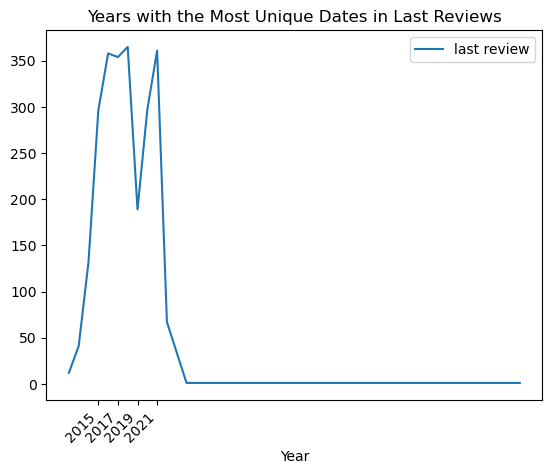

In [79]:
plt.figure(figsize=(15,6))

last_review_unique.plot.line('Year','last review')
plt.xticks(last_review_unique['Year'][3:10:2],rotation=45,ha='right')
plt.title("Years with the Most Unique Dates in Last Reviews")
plt.show()

Looking at the bar plot,we could see that majority of the data is from 2019. 

In [43]:
frequency_table_copy['Year'].value_counts()

2018    365
2021    361
2016    358
2017    354
2020    297
2015    296
2019    189
2014    132
2022     67
2013     41
2012     12
2024      1
2025      1
2026      1
2040      1
2058      1
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Frequency'>

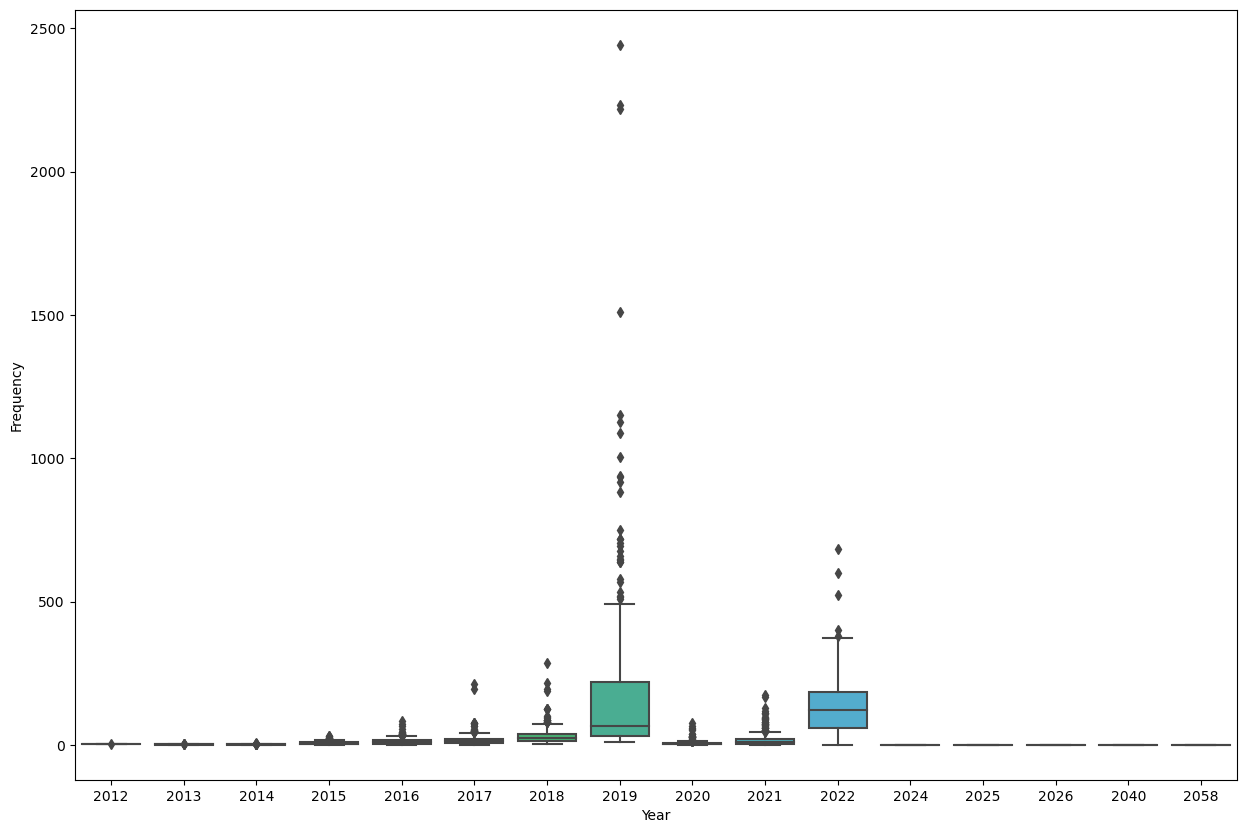

In [30]:
fig=plt.figure(figsize=(15,10))
sns.boxplot(x=frequency_table_copy['Year'],y=frequency_table_copy['Frequency'],data=frequency_table)

## Dropping rows with missing values

## Verifying for dropping rows

In [ ]:
msno.matrix(df)

**The job is done perfectly,as it is evidenced in the above table.The price and service fee columns are ready for data type conversion**

**As it is evidence from the above table, all the attributes hold appropriate data type at this point.**

## Getting Statistical Description

In [ ]:
df[['Construction year','Construction year','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365']].describe() # you can use “include=[X]” and “exclude=[X]” which will limit the results to specific data types